# Breast Cancer Dataset

Breast cancer classification with Keras API.

## The Data

### Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry 
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 3 is Mean Radius, field
        13 is Radius SE, field 23 is Worst Radius.

        - class:
                - WDBC-Malignant
                - WDBC-Benign

    :Summary Statistics:

    ===================================== ====== ======
                                           Min    Max
    ===================================== ====== ======
    radius (mean):                        6.981  28.11
    texture (mean):                       9.71   39.28
    perimeter (mean):                     43.79  188.5
    area (mean):                          143.5  2501.0
    smoothness (mean):                    0.053  0.163
    compactness (mean):                   0.019  0.345
    concavity (mean):                     0.0    0.427
    concave points (mean):                0.0    0.201
    symmetry (mean):                      0.106  0.304
    fractal dimension (mean):             0.05   0.097
    radius (standard error):              0.112  2.873
    texture (standard error):             0.36   4.885
    perimeter (standard error):           0.757  21.98
    area (standard error):                6.802  542.2
    smoothness (standard error):          0.002  0.031
    compactness (standard error):         0.002  0.135
    concavity (standard error):           0.0    0.396
    concave points (standard error):      0.0    0.053
    symmetry (standard error):            0.008  0.079
    fractal dimension (standard error):   0.001  0.03
    radius (worst):                       7.93   36.04
    texture (worst):                      12.02  49.54
    perimeter (worst):                    50.41  251.2
    area (worst):                         185.2  4254.0
    smoothness (worst):                   0.071  0.223
    compactness (worst):                  0.027  1.058
    concavity (worst):                    0.0    1.252
    concave points (worst):               0.0    0.291
    symmetry (worst):                     0.156  0.664
    fractal dimension (worst):            0.055  0.208
    ===================================== ====== ======

    :Missing Attribute Values: None

    :Class Distribution: 212 - Malignant, 357 - Benign

    :Creator:  Dr. William H. Wolberg, W. Nick Street, Olvi L. Mangasarian

    :Donor: Nick Street

    :Date: November, 1995

This is a copy of UCI ML Breast Cancer Wisconsin (Diagnostic) datasets.
https://goo.gl/U2Uwz2

Features are computed from a digitized image of a fine needle
aspirate (FNA) of a breast mass.  They describe characteristics of the cell nuclei present in the image.

Separating plane described above was obtained using
Multisurface Method-Tree (MSM-T) [K. P. Bennett, "Decision Tree
Construction Via Linear Programming." Proceedings of the 4th
Midwest Artificial Intelligence and Cognitive Science Society,
pp. 97-101, 1992], a classification method which uses linear
programming to construct a decision tree.  Relevant features
were selected using an exhaustive search in the space of 1-4
features and 1-3 separating planes.

The actual linear program used to obtain the separating plane
in the 3-dimensional space is that described in:
[K. P. Bennett and O. L. Mangasarian: "Robust Linear
Programming Discrimination of Two Linearly Inseparable Sets",
Optimization Methods and Software 1, 1992, 23-34].

This database is also available through the UW CS ftp server:

ftp ftp.cs.wisc.edu
cd math-prog/cpo-dataset/machine-learn/WDBC/

.. topic:: References

   - W.N. Street, W.H. Wolberg and O.L. Mangasarian. Nuclear feature extraction 
     for breast tumor diagnosis. IS&T/SPIE 1993 International Symposium on 
     Electronic Imaging: Science and Technology, volume 1905, pages 861-870,
     San Jose, CA, 1993.
   - O.L. Mangasarian, W.N. Street and W.H. Wolberg. Breast cancer diagnosis and 
     prognosis via linear programming. Operations Research, 43(4), pages 570-577, 
     July-August 1995.
   - W.H. Wolberg, W.N. Street, and O.L. Mangasarian. Machine learning techniques
     to diagnose breast cancer from fine-needle aspirates. Cancer Letters 77 (1994) 
     163-171.

----

## 1. Data Import and Library Setup

### 1.1 Importing Libraries

In [1]:
import pandas as pd
import numpy as np

### 1.2 Loading the Dataset

In [2]:
df = pd.read_csv('../DATA/cancer_classification.csv')

### 1.3 Initial Data Exploration

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [4]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
mean radius,569.0,14.127292,3.524049,6.981000,11.700000,13.370000,15.780000,28.11000
mean texture,569.0,19.289649,4.301036,9.710000,16.170000,18.840000,21.800000,39.28000
mean perimeter,569.0,91.969033,24.298981,43.790000,75.170000,86.240000,104.100000,188.50000
mean area,569.0,654.889104,351.914129,143.500000,420.300000,551.100000,782.700000,2501.00000
mean smoothness,569.0,0.096360,0.014064,0.052630,0.086370,0.095870,0.105300,0.16340
mean compactness,569.0,0.104341,0.052813,0.019380,0.064920,0.092630,0.130400,0.34540
mean concavity,569.0,0.088799,0.079720,0.000000,0.029560,0.061540,0.130700,0.42680
mean concave points,569.0,0.048919,0.038803,0.000000,0.020310,0.033500,0.074000,0.20120
mean symmetry,569.0,0.181162,0.027414,0.106000,0.161900,0.179200,0.195700,0.30400
mean fractal dimension,569.0,0.062798,0.007060,0.049960,0.057700,0.061540,0.066120,0.09744


----

## 2. Exploratory Data Analysis

### 2.1 Importing Visualization Libraries

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

### 2.2 Distribution of data, based on label.

<Axes: xlabel='benign_0__mal_1', ylabel='count'>

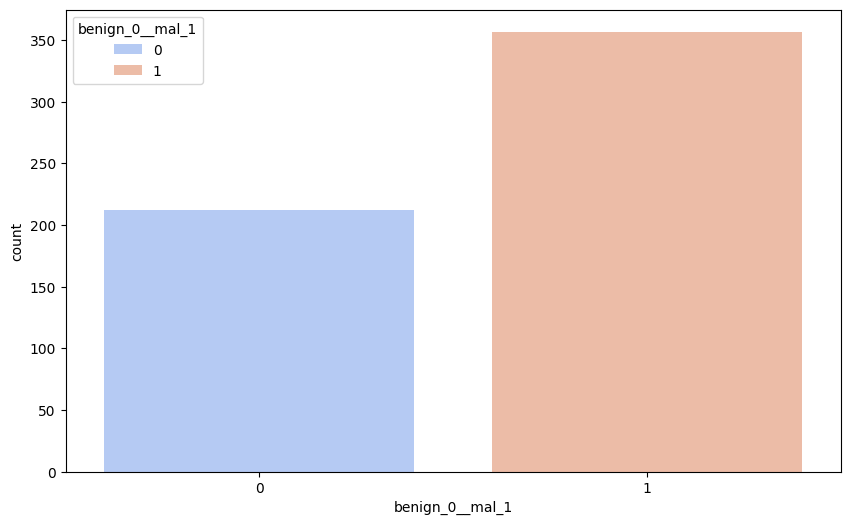

In [6]:
plt.figure(figsize = (10, 6))
sns.countplot(x='benign_0__mal_1',data=df, hue='benign_0__mal_1', palette='coolwarm')

### 2.3 Data Correlation

In [7]:
df.corr()['benign_0__mal_1'].sort_values()

worst concave points      -0.793566
worst perimeter           -0.782914
mean concave points       -0.776614
worst radius              -0.776454
mean perimeter            -0.742636
worst area                -0.733825
mean radius               -0.730029
mean area                 -0.708984
mean concavity            -0.696360
worst concavity           -0.659610
mean compactness          -0.596534
worst compactness         -0.590998
radius error              -0.567134
perimeter error           -0.556141
area error                -0.548236
worst texture             -0.456903
worst smoothness          -0.421465
worst symmetry            -0.416294
mean texture              -0.415185
concave points error      -0.408042
mean smoothness           -0.358560
mean symmetry             -0.330499
worst fractal dimension   -0.323872
compactness error         -0.292999
concavity error           -0.253730
fractal dimension error   -0.077972
symmetry error             0.006522
texture error              0

<Axes: >

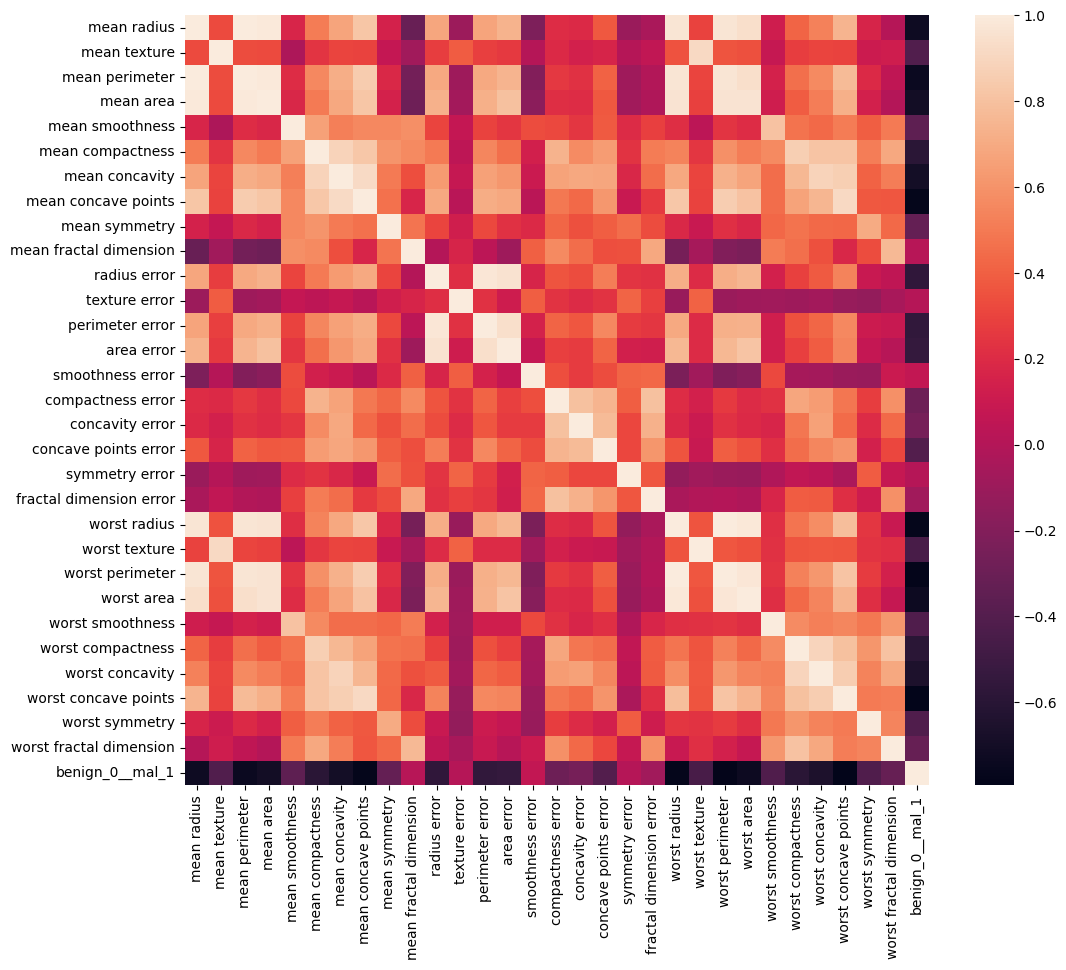

In [8]:
plt.figure(figsize = (12, 10))
sns.heatmap(df.corr())

<Axes: >

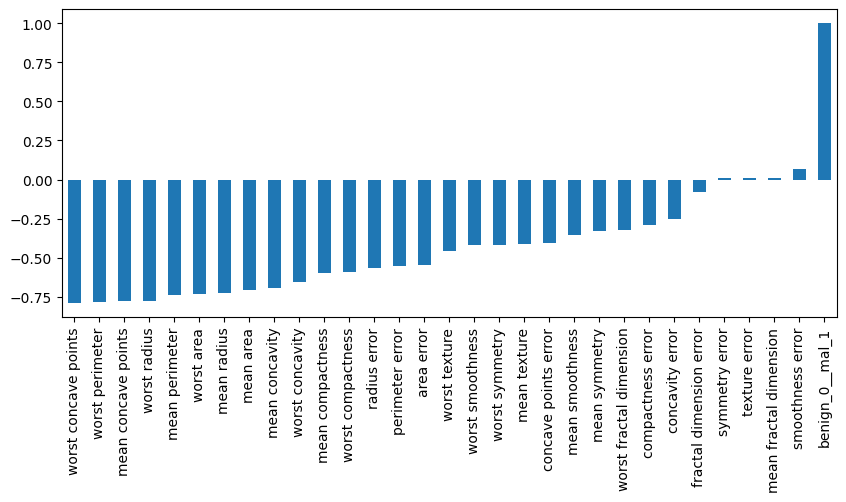

In [9]:
plt.figure(figsize = (10, 4))
df.corr()['benign_0__mal_1'].sort_values().plot(kind='bar')

<Axes: >

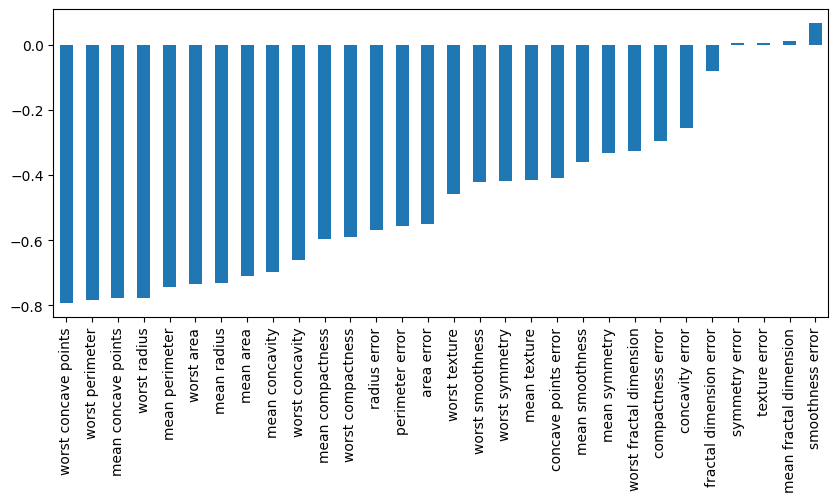

In [10]:
plt.figure(figsize = (10, 4))
df.corr()['benign_0__mal_1'][:-1].sort_values().plot(kind='bar')

---

## 3. Classification Modelling

### 3.1 Training and Testing Data

In [11]:
X = df.drop('benign_0__mal_1',axis=1).values
y = df['benign_0__mal_1'].values

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,random_state=101)

### 3.2 Scaling Data

In [14]:
from sklearn.preprocessing import MinMaxScaler

In [15]:
scaler = MinMaxScaler()

In [16]:
scaler.fit(X_train)

MinMaxScaler()

In [17]:
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

-----

### 3.3. Basic Tensorflow Deep-Learning Model

#### 3.3.1 Model Definition

In [18]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation,Dropout

In [19]:
X_train.shape

(426, 30)

In [20]:
model = Sequential()

model.add(Dense(units=30,activation='relu'))
model.add(Dense(units=15,activation='relu'))
model.add(Dense(units=1,activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam')

#### 3.3.2 Model Training

In [21]:
model.fit(x=X_train, 
          y=y_train, 
          epochs=600,
          validation_data=(X_test, y_test), verbose=1)

Epoch 1/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 3s 48ms/step - loss: 0.6788 - val_loss: 0.6475
Epoch 2/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.6407 - val_loss: 0.6079
Epoch 3/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.5966 - val_loss: 0.5520
Epoch 4/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.5412 - val_loss: 0.4871
Epoch 5/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.4789 - val_loss: 0.4222
Epoch 6/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.4217 - val_loss: 0.3613
Epoch 7/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.3549 - val_loss: 0.3108
Epoch 8/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.3019 - val_loss: 0.2733
Epoch 9/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.2592 - val_loss: 0.2469
Epoch 10/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.2500 - val_loss: 0.2278
Epoch 11/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.2372 - val_loss: 0.2054
Epoch 12/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0

426/426 [==============================] - 0s 95us/sample - loss: 0.0159 - val_loss: 0.2318
Epoch 464/600
426/426 [==============================] - 0s 99us/sample - loss: 0.0158 - val_loss: 0.2159
Epoch 465/600
426/426 [==============================] - 0s 98us/sample - loss: 0.0150 - val_loss: 0.2128
Epoch 466/600
426/426 [==============================] - 0s 101us/sample - loss: 0.0188 - val_loss: 0.2280
Epoch 467/600
426/426 [==============================] - 0s 98us/sample - loss: 0.0148 - val_loss: 0.2164
Epoch 468/600
426/426 [==============================] - 0s 105us/sample - loss: 0.0178 - val_loss: 0.2127
Epoch 469/600
426/426 [==============================] - 0s 102us/sample - loss: 0.0177 - val_loss: 0.2232
Epoch 470/600
426/426 [==============================] - 0s 96us/sample - loss: 0.0149 - val_loss: 0.2276
Epoch 471/600
426/426 [==============================] - 0s 98us/sample - loss: 0.0147 - val_loss: 0.2184
Epoch 472/600
426/426 [==============================] - 

Epoch 540/600
426/426 [==============================] - 0s 98us/sample - loss: 0.0126 - val_loss: 0.2521
Epoch 541/600
426/426 [==============================] - 0s 99us/sample - loss: 0.0116 - val_loss: 0.2455
Epoch 542/600
426/426 [==============================] - 0s 98us/sample - loss: 0.0132 - val_loss: 0.2970
Epoch 543/600
426/426 [==============================] - 0s 101us/sample - loss: 0.0172 - val_loss: 0.2415
Epoch 544/600
426/426 [==============================] - 0s 103us/sample - loss: 0.0183 - val_loss: 0.2610
Epoch 545/600
426/426 [==============================] - 0s 108us/sample - loss: 0.0125 - val_loss: 0.2543
Epoch 546/600
426/426 [==============================] - 0s 95us/sample - loss: 0.0163 - val_loss: 0.2473
Epoch 547/600
426/426 [==============================] - 0s 103us/sample - loss: 0.0139 - val_loss: 0.2642
Epoch 548/600
426/426 [==============================] - 0s 102us/sample - loss: 0.0134 - val_loss: 0.2489
Epoch 549/600
426/426 [==================

#### 3.3.3 Visualizing Training and Validation Loss

In [22]:
model_loss = pd.DataFrame(model.history.history)

<Axes: >

<Figure size 1000x400 with 0 Axes>

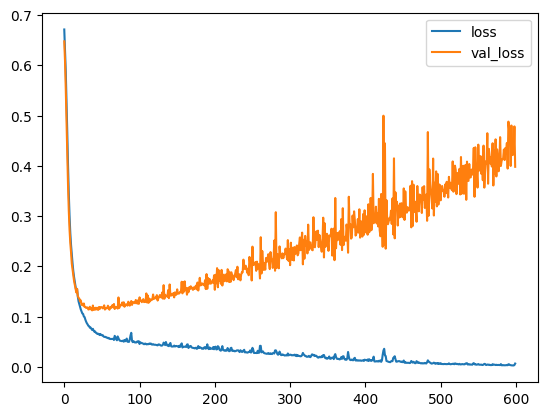

In [23]:
plt.figure(figsize = (10, 4))
model_loss.plot()

----

### 3.4 Model Training with Early Stopping

#### 3.4.1 Model Definition

In [24]:
model = Sequential()
model.add(Dense(units=30,activation='relu'))
model.add(Dense(units=15,activation='relu'))
model.add(Dense(units=1,activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam')

In [25]:
from tensorflow.keras.callbacks import EarlyStopping

In [26]:
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=25)

#### 3.4.2 Model Training

In [27]:
model.fit(x=X_train, 
          y=y_train, 
          epochs=600,
          validation_data=(X_test, y_test), verbose=1,
          callbacks=[early_stop])

Epoch 1/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.7055 - val_loss: 0.6865
Epoch 2/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.6730 - val_loss: 0.6525
Epoch 3/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.6286 - val_loss: 0.6222
Epoch 4/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.5986 - val_loss: 0.5852
Epoch 5/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.5600 - val_loss: 0.5393
Epoch 6/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.5229 - val_loss: 0.4826
Epoch 7/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.4554 - val_loss: 0.4172
Epoch 8/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.4161 - val_loss: 0.3532
Epoch 9/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.3516 - val_loss: 0.3008
Epoch 10/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.3011 - val_loss: 0.2607
Epoch 11/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.2449 - val_loss: 0.2372
Epoch 12/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.

#### 3.4.3 Visualizing Training and Validation Loss

<Axes: >

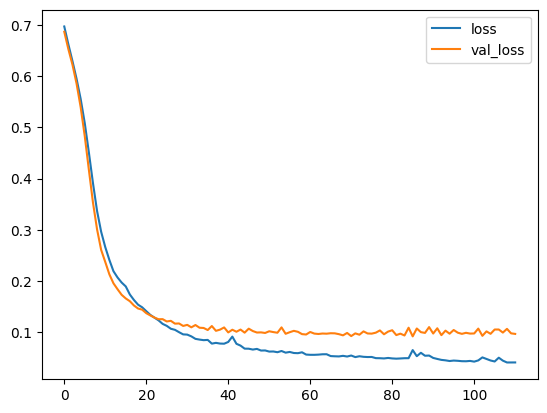

In [28]:
model_loss = pd.DataFrame(model.history.history)
model_loss.plot()

----

### 3.5 Model Training with early stopping and Dropout layers

#### 3.5.1 Model Definition

In [29]:
from tensorflow.keras.layers import Dropout

In [30]:
model = Sequential()
model.add(Dense(units=30,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(units=15,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(units=1,activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam')

#### 3.5.2 Model Training

In [31]:
model.fit(x=X_train, 
          y=y_train, 
          epochs=600,
          validation_data=(X_test, y_test), verbose=1,
          callbacks=[early_stop]
          )

Epoch 1/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.6767 - val_loss: 0.6731
Epoch 2/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.6728 - val_loss: 0.6563
Epoch 3/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.6553 - val_loss: 0.6393
Epoch 4/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.6458 - val_loss: 0.6220
Epoch 5/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.6185 - val_loss: 0.5976
Epoch 6/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.6199 - val_loss: 0.5785
Epoch 7/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.5906 - val_loss: 0.5626
Epoch 8/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.5797 - val_loss: 0.5417
Epoch 9/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.5762 - val_loss: 0.5219
Epoch 10/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.5326 - val_loss: 0.4976
Epoch 11/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.5080 - val_loss: 0.4698
Epoch 12/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.

#### 3.5.3 Visualizing Training and Validation Loss

<Axes: >

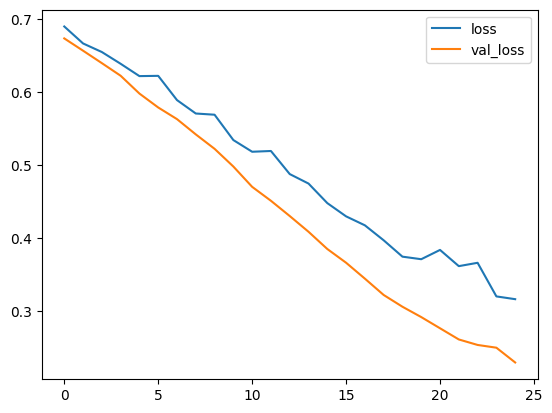

In [32]:
model_loss = pd.DataFrame(model.history.history)
model_loss.plot()

---

## 4. Model Evaluation with Dropout Layers

In [33]:
predictions = model.predict(X_test)
predicted_class = (predictions > 0.5).astype("int32")

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 


In [34]:
from sklearn.metrics import classification_report,confusion_matrix

In [35]:
print(classification_report(y_test, predicted_class))

              precision    recall  f1-score   support

           0       0.96      0.93      0.94        55
           1       0.96      0.98      0.97        88

    accuracy                           0.96       143
   macro avg       0.96      0.95      0.96       143
weighted avg       0.96      0.96      0.96       143



In [36]:
print(confusion_matrix(y_test, predicted_class))

[[51  4]
 [ 2 86]]


----

## 5. Conclusions and Recommendations


**Adding early stopping callback and dropout layers improves model training, by stopping training earlier.**